# Convolutional Neural Networks (CNN)
## Clasificacion de autos modelo SUV
Felipe Catalán

0 = NO_SUV
1 = SUV

## Librerias

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from torchvision import datasets
from torchvision import transforms 
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import pyplot as plt
import datetime

## Data

In [3]:
# estoy en la raiz
import os
print(os.listdir("data_original"))

['Cladificador_vehiculos_SUV']


In [4]:
# reviso que hay
from os import walk
for (dirpath, dirnames, filenames) in walk("data_original"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
#    print("File name: ", filenames)

Directory path:  data_original
Folder name:  ['Cladificador_vehiculos_SUV']
Directory path:  data_original\Cladificador_vehiculos_SUV
Folder name:  ['test', 'train']
Directory path:  data_original\Cladificador_vehiculos_SUV\test
Folder name:  ['NO_SUV', 'SUV']
Directory path:  data_original\Cladificador_vehiculos_SUV\test\NO_SUV
Folder name:  []
Directory path:  data_original\Cladificador_vehiculos_SUV\test\SUV
Folder name:  []
Directory path:  data_original\Cladificador_vehiculos_SUV\train
Folder name:  ['NO_SUV', 'SUV']
Directory path:  data_original\Cladificador_vehiculos_SUV\train\NO_SUV
Folder name:  []
Directory path:  data_original\Cladificador_vehiculos_SUV\train\SUV
Folder name:  []


In [5]:
# estilo de imagen retina
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

# import helper  # helper function is defined below, no need for importing

In [7]:
# define helper.py 
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

### Obteniendo la Data

In [9]:
PATH = 'data_original\Cladificador_vehiculos_SUV'

In [43]:
# data_dir = 'data_original\Cladificador_vehiculos_SUV/train'
data_dir = PATH + '/train' # load from Kaggle

transform = transforms.Compose([transforms.Resize(32),
                                transforms.CenterCrop(32),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                    (0.2470, 0.2435, 0.2616))
                               ])# TOD: compose transforms here
dataset = datasets.ImageFolder(data_dir, transform=transform)     ##TO Do: create the ImageFolder
dataloader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True) # TO Do: use the

In [64]:
# data_dir = 'data_original\Cladificador_vehiculos_SUV/train'
data_dir_t = PATH + '/test' # load from Kaggle
dataset_t = datasets.ImageFolder(data_dir_t, transform=transform)     ##TO Do: create the ImageFolder
dataloader_t = torch.utils.data.DataLoader(dataset_t, batch_size=64, shuffle=True) # TO Do: use the

<AxesSubplot: >

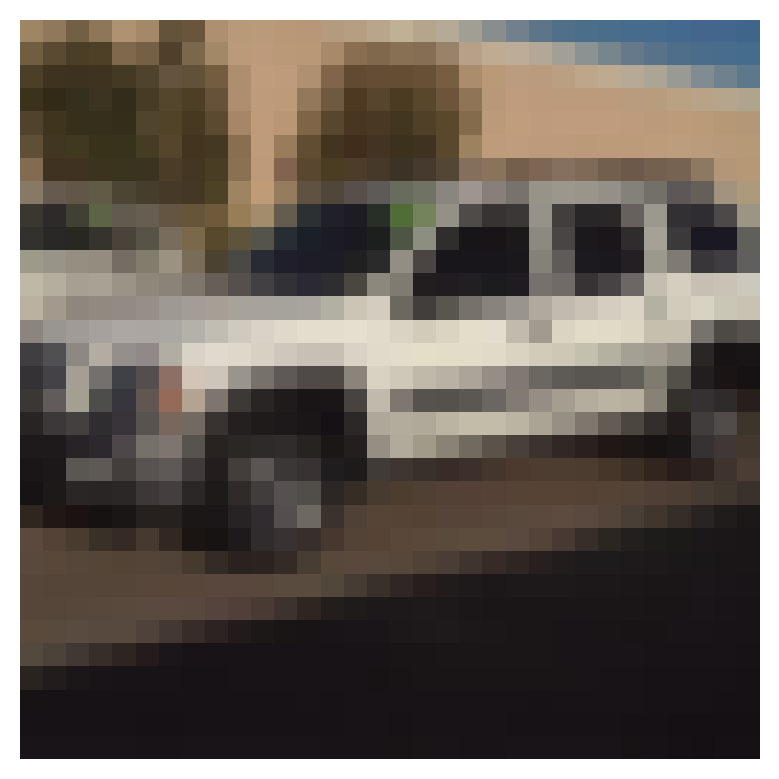

In [47]:
# Plot one image
img, label = dataset[6000]
imshow(img)


In [50]:
label

1

In [48]:
type(img)

torch.Tensor

In [49]:
print(img.shape)

torch.Size([3, 32, 32])


<AxesSubplot: >

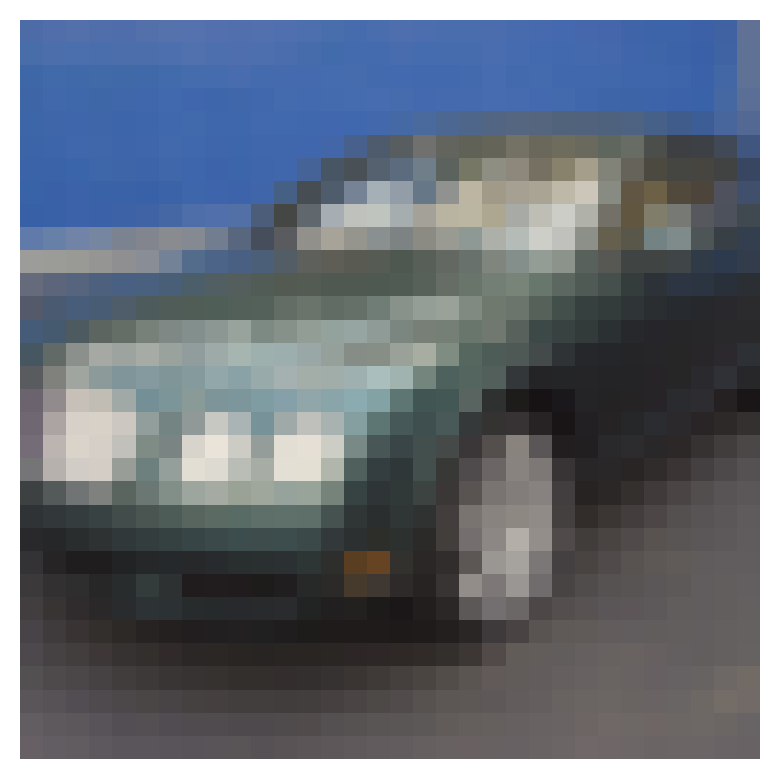

In [67]:
# Plot one image
img, label = dataset_t[600]
imshow(img)


In [68]:
#### NOOOOO me bota todo porque?
# Select birds and airplanes
label_map = {0:0, 1:1}
class_names = ['NO_SUV', 'SUV']

dataset_1 = [(img, label_map[label]) for img, label in dataset if label in [0, 1]]
dataset_2 = [(img, label_map[label]) for img, label in dataset_t if label in [0, 1]]

## Modelo

In [53]:
# Model 
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        ## 2 convolutional layer
        # elementos a utilizar hay que cambiarles los valores?
        # 3(todos los colores), 16 --> 8,16,32,64,128(hiperparametro) estan bien.
        # Kernel_size matriz o filtro que se aplicaba en la imagen original.
        # Kernel_size 3ntre 3 y 5 los valores habituales.
        # padding me ayuda a debolver la imagen a su tamaño original
        # padding va de 0 hasta 2, hiperparametro(probar y ver cual funciona mejor)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1) # convolutional layer (3=channel=3colores)(kernel=filtro?)
        # el output va a ser el input del siguiente 16
        # estos valores hay que ir probandolos
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1) # convolutional layer
        ## fully-connected
        # porque es 8*8*8?
        # un monton de informacion de un layer gigante lo reduje a 32
        self.fc1 = nn.Linear(8 * 8 * 8, 32)                     # Fully connected
        # el 32 que salio volvio a entrar, es un 2 por la dummy
        self.fc2 = nn.Linear(32, 2)                             # Fully connected
    def forward(self, x): # input img
        # aplicando los layers
        # usamos el convolutional layer 1
        #torch.tanh es la funcion de activacion
        # max_pool2d es para reducir de tamaño la matriz
        # x es n vector : [batch_size, channel, h, w]
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)        # max pooling
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)      # max pooling
        out = out.view(-1, 8 * 8 * 8)                           # tranform the out
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out  # dim: number of class

El modelo funciona?

In [54]:
model = CNN()

In [55]:
# [batch_size, channel, h, w]
mt = torch.randn(1,3,32,32)

In [56]:
model(mt)

tensor([[-0.0284,  0.0245]], grad_fn=<AddmmBackward0>)

In [57]:
model(mt).shape

torch.Size([1, 2])

In [58]:
# Training function 
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    loss_list = []
    # definimos los ipoks(?), es decir, cuantas veces vamos a pasar toda la muestra por el modelo
    for epoch in range(1, n_epochs + 1):
        # guardamos los valores de la funcion de perdida
        loss_train = 0.0 
        # labels: categoria 0 o 1
        # imags imagen poasa por el modelo
        for imgs, labels in train_loader:  # batch 
            # modelo te da un output
            outputs = model(imgs)
            # el output se compara con los labels
            loss = loss_fn(outputs, labels)
            # receteo los valores gradientes
            optimizer.zero_grad()
            # calculo el back propagation
            loss.backward()               # backpro
            # hago el update de los parametros
            optimizer.step()              # update w
            
            #iteraciones

            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('Epoch {}, Training loss {}'.format(epoch,
            loss_train / len(train_loader)))
            loss_list.append(loss_train / len(train_loader))
    return loss_list

In [59]:
# Dataloader
# en lugar de pasar las 6500 imagenes al modelo, le pasamos en grupos de 64 o sino es muy pesado
# en vez de 64 puede ser 32?
# shuffle reordena las imagenes en diferentes formas para que el modelo no memorice las imagenes.

train_loader = torch.utils.data.DataLoader(dataset_1, batch_size=64, shuffle=True)

In [62]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

loss_fn, que funcion de perdida tengo que usar?

- Uso Cross entropi loss porque estoy haciendo clasificacion.

El optimizer es el mismo el estocastic gradian decent(?) 

In [63]:
# Run, traning
model = CNN()                                      # call our cnn class
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Stochastic gradient descent, Lr:01,0.01,0.001
loss_fn = nn.CrossEntropyLoss()                    # Loss function

Loss1 = training_loop(
    n_epochs = 50,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

Epoch 1, Training loss 0.49042541197701994
Epoch 10, Training loss 0.447690767400405
Epoch 20, Training loss 0.43791962414979935
Epoch 30, Training loss 0.427215764773827
Epoch 40, Training loss 0.41321130023867475
Epoch 50, Training loss 0.39842475746192185


Text(0, 0.5, 'Loss')

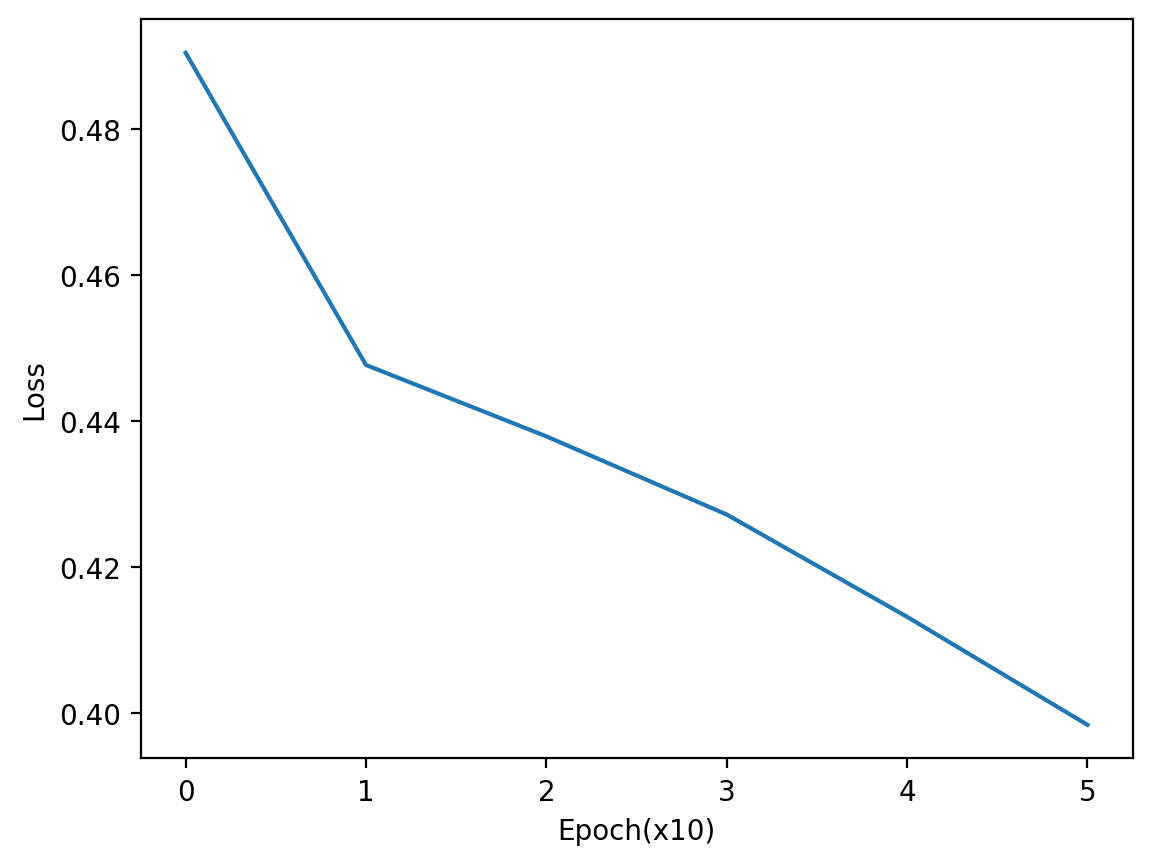

In [70]:
# plot loss
plt.plot(Loss1)
plt.xlabel('Epoch(x10)')
plt.ylabel('Loss')

## Resultados

In [71]:
# Testing metric
train_loader = torch.utils.data.DataLoader(dataset_1, batch_size=64,
                                            shuffle=False)
val_loader = torch.utils.data.DataLoader(dataset_2, batch_size=64,
                                            shuffle=False)
def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                # metrics: Acc, F1, AUC, Precision, Recall, 
                correct += int((predicted == labels).sum())
        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.83
Accuracy val: 0.81
